In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Important Libraries

In [ ]:
import os
import cv2
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import TimeDistributed, Conv2D, MaxPooling2D

In [ ]:
seed_constant = 5
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

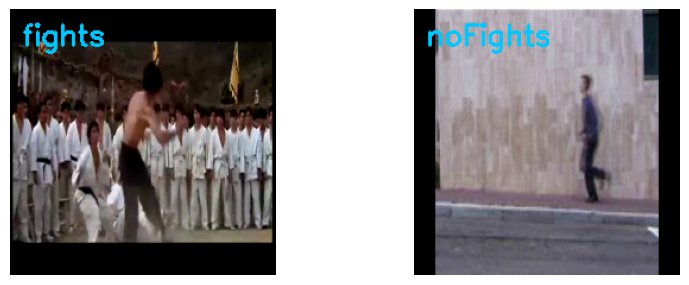

In [ ]:
plt.figure(figsize = (20, 20))

all_classes_names = os.listdir('/content/drive/MyDrive/Peliculas')

# random_range = random.sample(range(len(all_classes_names)), len(all_classes_names))

for counter, random_index in enumerate(range(len(all_classes_names)), 1):

    selected_class_Name = all_classes_names[random_index]

    video_files_names_list = os.listdir(f'/content/drive/MyDrive/Peliculas/{selected_class_Name}')

    selected_video_file_name = random.choice(video_files_names_list)

    video_reader = cv2.VideoCapture(f'/content/drive/MyDrive/Peliculas/{selected_class_Name}/{selected_video_file_name}')
    video_reader.set(1, 25)

    _, bgr_frame = video_reader.read()

    bgr_frame = cv2.resize(bgr_frame ,(224,224))
    video_reader.release()
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 200, 255), 2)

    plt.subplot(5, 4, counter);plt.imshow(rgb_frame);plt.axis('off')

In [ ]:
IMAGE_HEIGHT , IMAGE_WIDTH = 64, 64

SEQUENCE_LENGTH = 30

DATASET_DIR = "/content/drive/MyDrive/Peliculas"

CLASSES_LIST = ["noFights", "fights"]

# Data Preprocessing

In [ ]:
def frames_extraction(video_path):

    frames_list = []

    video_reader = cv2.VideoCapture(video_path)

    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH), 1)

    for frame_counter in range(SEQUENCE_LENGTH):

        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        success, frame = video_reader.read()

        if not success:
            break

        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))

        normalized_frame = resized_frame / 255

        frames_list.append(normalized_frame)

    video_reader.release()

    return frames_list

features: A list containing the extracted frames of the videos.

labels:  A list containing the indexes of the classes associated with the videos.

In [ ]:
def create_dataset():

    features = []
    labels = []
    video_files_paths = []

    for class_index, class_name in enumerate(CLASSES_LIST):

        print(f'Extracting Data of Class: {class_name}')

        files_list = os.listdir(os.path.join(DATASET_DIR, class_name))

        for file_name in files_list:

            video_file_path = os.path.join(DATASET_DIR, class_name, file_name)

            frames = frames_extraction(video_file_path)

            if len(frames) == SEQUENCE_LENGTH:

                features.append(frames)
                labels.append(class_index)
                video_files_paths.append(video_file_path)

    features = np.asarray(features)
    labels = np.array(labels)

    return features, labels, video_files_paths

In [ ]:
# Create the dataset.
features, labels, video_files_paths = create_dataset()

Extracting Data of Class: noFights
Extracting Data of Class: fights


Using Keras to_categorical method to convert labels into one-hot-encoded vectors

In [ ]:
one_hot_encoded_labels = to_categorical(labels)
print(one_hot_encoded_labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

In [ ]:
# Split the Data into Train ( 75% ) and Test Set ( 25% ).
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels, test_size = 0.25, shuffle = True, random_state = seed_constant)
features = None
labels = None

# Creating Model

LRCN -> Long-term Recurrent Convolutional Network

In [ ]:
def create_LRCN_model():

    model = Sequential()

    model.add(TimeDistributed(Conv2D(32, (3, 3), padding='same',activation = 'relu'), input_shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    model.add(TimeDistributed(MaxPooling2D((4, 4))))

    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((4, 4))))

    model.add(TimeDistributed(Conv2D(128, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))

    model.add(TimeDistributed(Conv2D(256, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))

    #model.add(TimeDistributed(Conv2D(512, (3, 3), padding='same',activation = 'relu')))
    #model.add(TimeDistributed(MaxPooling2D((2, 2))))

    # model.add(TimeDistributed(Conv2D(1024, (3, 3), padding='same',activation = 'relu')))
    # model.add(TimeDistributed(MaxPooling2D((2, 2))))

    model.add(TimeDistributed(Flatten()))

    model.add(LSTM(32))

    model.add(Dense(len(CLASSES_LIST), activation = 'softmax'))

    # model.add(LSTM(128, return_sequences=True))
    # model.add(LSTM(64))

    # model.add(Dense(256, activation='relu'))

    # model.add(Dense(len(CLASSES_LIST), activation='softmax'))

    #model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
    #model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))


    model.summary()

    return model

In [ ]:
model = create_LRCN_model()
input_shape = model.input_shape
print(input_shape)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, 30, 64, 64, 32)    896       
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 30, 16, 16, 32)    0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 30, 16, 16, 64)    18496     
 stributed)                                                      
                                                                 
 time_distributed_3 (TimeDi  (None, 30, 4, 4, 64)      0         
 stributed)                                                      
                                                                 
 time_distributed_4 (TimeDi  (None, 30, 4, 4, 128)     7

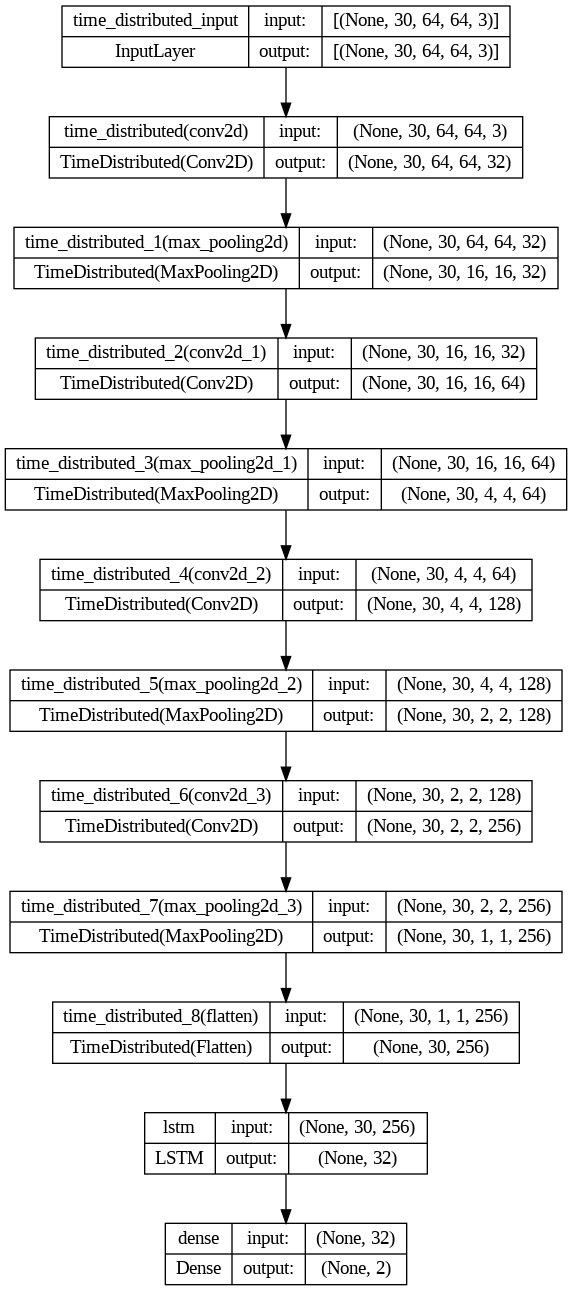

In [ ]:
plot_model(model, to_file = 'Suspicious_Human_Activity_LRCN_Model.png', show_shapes = True, show_layer_names = True)

# Model Training

In [ ]:
def add_noise(data, noise_factor=0.2):
    noise = np.random.normal(loc=0.0, scale=1.0, size=data.shape)
    noisy_data = data + noise_factor * noise
    return np.clip(noisy_data, 0.0, 1.0)
noisy_features_train = add_noise(features_train)

early_stopping_callback = EarlyStopping(monitor = 'accuracy', patience = 10, mode = 'max', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics to the model.
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

model_training_history = model.fit(x = noisy_features_train, y = labels_train, epochs = 70, batch_size = 4 , shuffle = True, validation_split = 0.25, callbacks = [early_stopping_callback])

Epoch 1/70
28/28 [==============================] - 21s 585ms/step - loss: 0.6726 - accuracy: 0.5625 - val_loss: 0.6031 - val_accuracy: 0.8684
Epoch 2/70
28/28 [==============================] - 17s 605ms/step - loss: 0.3625 - accuracy: 0.8482 - val_loss: 0.1593 - val_accuracy: 0.9474
Epoch 3/70
28/28 [==============================] - 19s 676ms/step - loss: 0.2653 - accuracy: 0.8929 - val_loss: 0.2516 - val_accuracy: 0.8947
Epoch 4/70
28/28 [==============================] - 17s 604ms/step - loss: 0.1441 - accuracy: 0.9554 - val_loss: 0.1085 - val_accuracy: 0.9474
Epoch 5/70
28/28 [==============================] - 16s 577ms/step - loss: 0.1429 - accuracy: 0.9464 - val_loss: 0.0986 - val_accuracy: 1.0000
Epoch 6/70
28/28 [==============================] - 16s 566ms/step - loss: 0.0737 - accuracy: 0.9821 - val_loss: 0.0197 - val_accuracy: 1.0000
Epoch 7/70
28/28 [==============================] - 16s 580ms/step - loss: 0.0190 - accuracy: 1.0000 - val_loss: 0.0505 - val_accuracy: 1.0000

In [ ]:
model.save("Suspicious_Human_Activity_Detection_LRCN_Model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
Exception ignored in: <function _xla_gc_callback at 0x7b3e30d3c1f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


# Loss and Accuracy Graphs

In [ ]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):

    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]

    # Construct a range object which will be used as x-axis (horizontal plane) of the graph.
    epochs = range(len(metric_value_1))

    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)

    plt.title(str(plot_name))


    plt.legend()

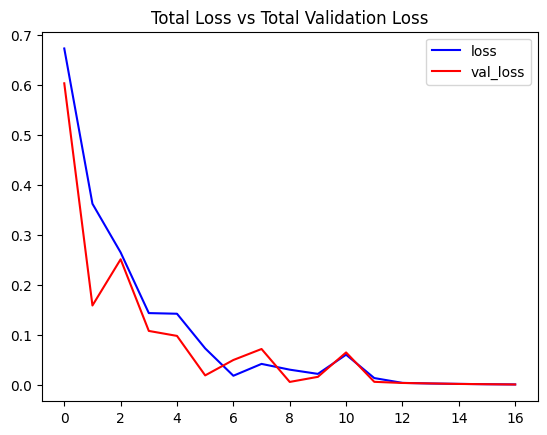

In [ ]:
plot_metric(model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

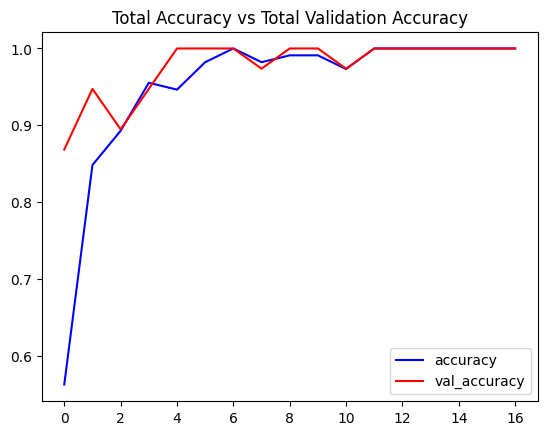

In [ ]:
plot_metric(model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')


# Accuracy on Test Dataset

In [ ]:
acc = 0
for i in range(len(features_test)):
  predicted_label = np.argmax(model.predict(np.expand_dims(features_test[i],axis =0))[0])
  actual_label = np.argmax(labels_test[i])
  if predicted_label == actual_label:
      acc += 1
acc = (acc * 100)/len(labels_test)
print("Accuracy =",acc)

1/1 [==============================] - 0s 87ms/step
Accuracy = 94.11764705882354


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import os
import cv2
import numpy as np
import tensorflow as tf

# Data Preprocessing Constants
IMAGE_HEIGHT, IMAGE_WIDTH = 64, 64
SEQUENCE_LENGTH = 30
DATASET_DIR = "/content/drive/MyDrive/Peliculas"
CLASSES_LIST = ["noFights", "fights"]

# Load the trained model
model = tf.keras.models.load_model('/content/Suspicious_Human_Activity_Detection_LRCN_Model.h5')

# Function to extract frames from a video
def frames_extraction(video_path):
    frames_list = []
    video_reader = cv2.VideoCapture(video_path)
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH), 1)
    for frame_counter in range(SEQUENCE_LENGTH):
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)
        success, frame = video_reader.read()
        if not success:
            break
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        normalized_frame = resized_frame / 255
        frames_list.append(normalized_frame)
    video_reader.release()
    return frames_list

# Streamlit App
st.title('Video Classification App')

uploaded_file = st.file_uploader("Upload a video", type=["mp4"])

if uploaded_file is not None:
    # Save the uploaded video
    with open('temp_video.mp4', 'wb') as f:
        f.write(uploaded_file.getvalue())

    # Extract frames from the uploaded video
    frames = frames_extraction('temp_video.mp4')

    # Make predictions using the trained model
    predictions = model.predict(np.array(frames))

    # Display the results
    st.write('Predictions:')
    for i, pred in enumerate(predictions):
        st.write(f'Frame {i+1}: {CLASSES_LIST[np.argmax(pred)]}')

    # Display the video
    st.video('temp_video.mp4')

# Clean up the temporary video file
if os.path.exists('temp_video.mp4'):
    os.remove('temp_video.mp4')


Overwriting app.py


In [ ]:
!streamlit run /content/drive/MyDrive/Peliculas/app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: /content/drive/MyDrive/Peliculas/app.py
